# <center> Deriving New Variables & Visualizations </center>

## 01. Import libraries & data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 

path = r'C:\Users\thang\Desktop\Data Analytics\Data Analytics Immersion\Python\Instacart Basket Analysis'

In [2]:
data = pd.read_pickle(os.path.join(path, '2. Data', 'Modified', 'Instacart_Data.pkl'))

In [8]:
data.shape

(32404859, 20)

## 02. New Variables

### Price Range 

In [39]:
# find out all availabe prices & decide filter numbers 
data['prices'].describe()

count    3.240486e+07
mean     1.153842e+01
std      4.956592e+02
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [4]:
# create price_range column using 5 & 15 as price filters on prices column
data.loc[data['prices'] <= 5, 'price_range'] = 'Low-range product'
data.loc[(data['prices'] > 5) & (data['prices'] <= 15), 'price_range'] = 'Mid-range product'
data.loc[data['prices'] > 15, 'price_range'] = 'High-range product'

In [5]:
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,first_name,last_name,gender,state,age,n_dependants,fam_status,income,price_range
0,2539329,1,1,2,8,NaN,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product
1,2398795,1,2,3,7,15.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product
2,473747,1,3,3,12,21.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product
3,2254736,1,4,4,7,29.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product
4,431534,1,5,4,15,28.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product


In [6]:
# check for NaNs
data['price_range'].value_counts(dropna = False)

Mid-range product     19710469
Low-range product     12301357
High-range product      393033
Name: price_range, dtype: int64

### Busiest_Day - most occuring order day

In [9]:
# find which days are busiest from order_day_of_week column
data['order_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [10]:
# create busiest_day column using 0 as busiest 4 as least busy days
data.loc[data['order_day_of_week'] == 0, 'busiest_day'] = 'Busiest day'
data.loc[data['order_day_of_week'] == 4, 'busiest_day'] = 'Least busy day'
data.loc[(data['order_day_of_week'] != 0) & (data['order_day_of_week'] != 4), 'busiest_day'] = 'Regularly busy'

In [11]:
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,...,first_name,last_name,gender,state,age,n_dependants,fam_status,income,price_range,busiest_day
0,2539329,1,1,2,8,NaN,196,Soda,77,7,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy
1,2398795,1,2,3,7,15.0,196,Soda,77,7,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy
2,473747,1,3,3,12,21.0,196,Soda,77,7,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy
3,2254736,1,4,4,7,29.0,196,Soda,77,7,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Least day
4,431534,1,5,4,15,28.0,196,Soda,77,7,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Least day


In [12]:
# check for NaNs
data['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least day          3783802
Name: busiest_day, dtype: int64

### Busiest_Hour - most occuring hour

In [13]:
# find which hours are busiest from order_hour_of_day
data['order_hour_of_day'].value_counts(dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [14]:
# most orders: 10,11,14,15,13,12,16,9
# average orders: 17,8,18,19,20,7,21,22
# fewest orders: 23,6,0,1,5,2,4,3

data.loc[data['order_hour_of_day'].isin([10,11,14,15,13,12,16,9]), 'busiest_hour'] = 'Most orders'
data.loc[data['order_hour_of_day'].isin([17,8,18,19,20,7,21,22]), 'busiest_hour'] = 'Average orders'
data.loc[data['order_hour_of_day'].isin([23,6,0,1,5,2,4,3]), 'busiest_hour'] = 'Fewest orders'

In [15]:
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,...,last_name,gender,state,age,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour
0,2539329,1,1,2,8,NaN,196,Soda,77,7,...,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders
1,2398795,1,2,3,7,15.0,196,Soda,77,7,...,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders
2,473747,1,3,3,12,21.0,196,Soda,77,7,...,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Most orders
3,2254736,1,4,4,7,29.0,196,Soda,77,7,...,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Least day,Average orders
4,431534,1,5,4,15,28.0,196,Soda,77,7,...,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Least day,Most orders


In [16]:
# check for NaNs
data['busiest_hour'].value_counts(dropna = False)

Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: busiest_hour, dtype: int64

### Loyalty_Flag - how many orders customers purchase

In [20]:
# aggregate order_number by customer_id to find how many orders each customer has
data['max_order'] = data.groupby(['customer_id'])['order_number'].transform(np.max)

In [28]:
# check for NaNs
data['max_order'].isna().sum()

0

In [21]:
# find good filter numbers
data['max_order'].describe()

count    3.240486e+07
mean     3.305217e+01
std      2.515525e+01
min      1.000000e+00
25%      1.300000e+01
50%      2.600000e+01
75%      4.700000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [29]:
# create loyalty_flag column based on customers with max order number of 40 & 10
data.loc[data['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
data.loc[(data['max_order'] <= 40) & (data['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
data.loc[data['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [30]:
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,...,state,age,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag
0,2539329,1,1,2,8,NaN,196,Soda,77,7,...,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer
1,2398795,1,2,3,7,15.0,196,Soda,77,7,...,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer
2,473747,1,3,3,12,21.0,196,Soda,77,7,...,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Most orders,10,New customer
3,2254736,1,4,4,7,29.0,196,Soda,77,7,...,Alabama,31,3,married,40423,Mid-range product,Least day,Average orders,10,New customer
4,431534,1,5,4,15,28.0,196,Soda,77,7,...,Alabama,31,3,married,40423,Mid-range product,Least day,Most orders,10,New customer


In [32]:
# check for NaNs
data['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

### Spending_Flag - how much customers spend on average 

In [33]:
# Aggregate prices by customer_Id to find out how much each customer spends on average
data['average_price'] = data.groupby(['customer_id'])['prices'].transform(np.mean)

In [34]:
# check for NaNs
data['average_price'].isna().sum()

0

In [35]:
# find good filter numbers
data['average_price'].describe()

count    3.240486e+07
mean     1.153842e+01
std      8.324257e+01
min      1.000000e+00
25%      6.943548e+00
50%      7.381418e+00
75%      7.811989e+00
max      2.500500e+04
Name: average_price, dtype: float64

In [36]:
# create spending_flag column based on average price of 10 for customers 
data.loc[data['average_price'] < 10, 'spending_flag'] = 'Low spender'
data.loc[data['average_price'] >= 10, 'spending_flag'] = 'High spender'

In [37]:
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,...,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag
0,2539329,1,1,2,8,NaN,196,Soda,77,7,...,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6.084746,Low spender
1,2398795,1,2,3,7,15.0,196,Soda,77,7,...,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6.084746,Low spender
2,473747,1,3,3,12,21.0,196,Soda,77,7,...,3,married,40423,Mid-range product,Regularly busy,Most orders,10,New customer,6.084746,Low spender
3,2254736,1,4,4,7,29.0,196,Soda,77,7,...,3,married,40423,Mid-range product,Least day,Average orders,10,New customer,6.084746,Low spender
4,431534,1,5,4,15,28.0,196,Soda,77,7,...,3,married,40423,Mid-range product,Least day,Most orders,10,New customer,6.084746,Low spender


In [38]:
# check for NaNs
data['spending_flag'].value_counts(dropna = False)

Low spender     31837216
High spender      567643
Name: spending_flag, dtype: int64

### Order_Frequency_Flag - how many times customers order on average

In [40]:
# find the average days since last order
data['median_days_since_prior_order'] = data.groupby(['customer_id'])['days_since_prior_order'].transform(np.mean)

In [41]:
# check for NaNs
data['median_days_since_prior_order'].isna().sum()

5

In [42]:
# find good filter numbers
data['median_days_since_prior_order'].describe()

count    3.240485e+07
mean     1.137498e+01
std      6.056176e+00
min      0.000000e+00
25%      6.852941e+00
50%      9.884956e+00
75%      1.486500e+01
max      3.000000e+01
Name: median_days_since_prior_order, dtype: float64

In [43]:
# ignore the NaNs & create order_frequency_flag column using median days of 20 & 10 as filter
data.loc[data['median_days_since_prior_order'] > 20, 'order_frequency_flag'] = 'Non-frequent customer'
data.loc[(data['median_days_since_prior_order'] > 10) & (data['median_days_since_prior_order'] <= 20), 'order_frequency_flag'] = 'Regular customer'
data.loc[data['median_days_since_prior_order'] <= 10, 'order_frequency_flag'] = 'Frequent customer'

In [44]:
data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,...,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,Soda,77,7,...,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6.084746,Low spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,Soda,77,7,...,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6.084746,Low spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,196,Soda,77,7,...,40423,Mid-range product,Regularly busy,Most orders,10,New customer,6.084746,Low spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,Soda,77,7,...,40423,Mid-range product,Least day,Average orders,10,New customer,6.084746,Low spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,196,Soda,77,7,...,40423,Mid-range product,Least day,Most orders,10,New customer,6.084746,Low spender,20.259259,Non-frequent customer


In [47]:
# check for NaNs
data['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        16468582
Regular customer         12521159
Non-frequent customer     3415113
NaN                             5
Name: order_frequency_flag, dtype: int64

## 04. Downcast & Export

In [51]:
data.dtypes

order_id                            int32
customer_id                         int32
order_number                         int8
order_day_of_week                    int8
order_hour_of_day                    int8
days_since_prior_order            float64
product_id                          int32
product_name                       object
aisle_id                            int16
department_id                        int8
prices                              int32
first_name                         object
last_name                          object
gender                           category
state                            category
age                                  int8
n_dependants                         int8
fam_status                       category
income                              int32
price_range                        object
busiest_day                        object
busiest_hour                       object
max_order                            int8
loyalty_flag                      

In [52]:
data.describe()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,aisle_id,department_id,prices,age,n_dependants,income,max_order,average_price,median_days_since_prior_order
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,7.119612e+01,9.919792e+00,1.153842e+01,4.946527e+01,1.501896e+00,9.943773e+04,3.305217e+01,1.153842e+01,1.137498e+01
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,3.821139e+01,6.281485e+00,4.956592e+02,1.848558e+01,1.118865e+00,4.305727e+04,2.515525e+01,8.324257e+01,6.056176e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.100000e+01,4.000000e+00,4.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04,1.300000e+01,6.943548e+00,6.852941e+00
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,8.300000e+01,9.000000e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04,2.600000e+01,7.381418e+00,9.884956e+00
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.070000e+02,1.600000e+01,1.100000e+01,6.500000e+01,3.000000e+00,1.279120e+05,4.700000e+01,7.811989e+00,1.486500e+01
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,8.100000e+01,3.000000e+00,5.939010e+05,9.900000e+01,2.500500e+04,3.000000e+01


In [54]:
# change data types appropriately
data['busiest_day'] = data['busiest_day'].astype('category')
data['busiest_hour'] = data['busiest_hour'].astype('category')
data['loyalty_flag'] = data['loyalty_flag'].astype('category')
data['average_price'] = data['average_price'].astype('int16')
data['spending_flag'] = data['spending_flag'].astype('category')
data['order_frequency_flag'] = data['order_frequency_flag'].astype('category')

In [7]:
# export
data.to_pickle(os.path.join(path, '2. Data', 'Modified', 'Instacart_Data_New_Variables.pkl'))

## 04. Visualizations

In [2]:
new_data = pd.read_pickle(os.path.join(path, '2. Data', 'Modified', 'Instacart_Data_New_Variables.pkl'))

In [6]:
pd.options.display.max_columns = None
new_data.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,first_name,last_name,gender,state,age,n_dependants,fam_status,income,price_range,busiest_day,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Regularly busy,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Average orders,10,New customer,6,Low spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,196,Soda,77,7,9,Linda,Nguyen,Female,Alabama,31,3,married,40423,Mid-range product,Least busy day,Most orders,10,New customer,6,Low spender,20.259259,Non-frequent customer


### Bar Charts

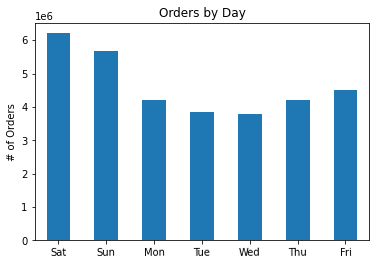

In [3]:
# busiest_days of the week
bar_busiest_day = new_data['order_day_of_week'].value_counts().sort_index().plot.bar(rot=1, title = 'Orders by Day', ylabel = '# of Orders').set_xticklabels(['Sat','Sun','Mon','Tue','Wed','Thu','Fri'])


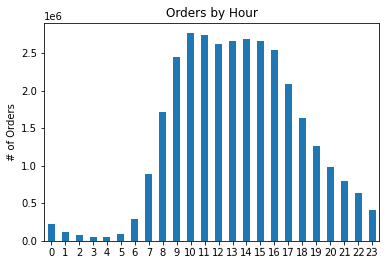

In [4]:
# busiest hours of the day
bar_busiest_hour = new_data['order_hour_of_day'].value_counts().sort_index().plot.bar(rot=1, title = 'Orders by Hour', ylabel = '# of Orders')

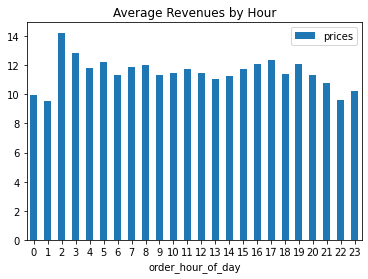

In [11]:
# most spent hours of the day 
bar_reveunue_hour = new_data.groupby('order_hour_of_day').agg({'prices':'mean'}).plot.bar(rot = 1, title = 'Average Revenues by Hour')

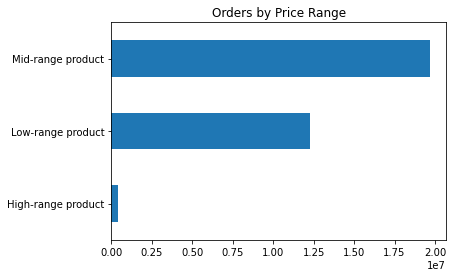

In [12]:
# price rage 
bar_price_range = new_data['price_range'].value_counts().sort_values().plot.barh(title = 'Orders by Price Range')

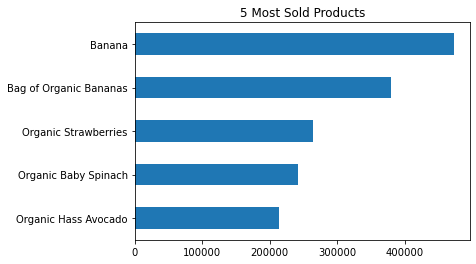

In [13]:
# product
bar_best_product = new_data['product_name'].value_counts().head(5).sort_values().plot.barh(title = '5 Most Sold Products')

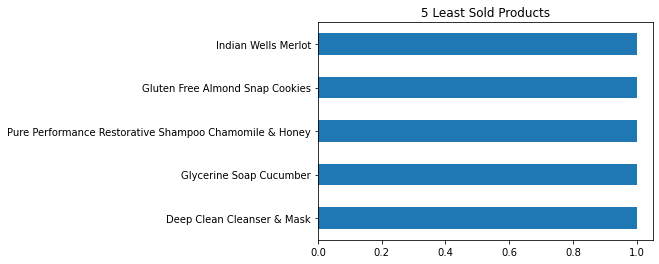

In [14]:
bar_worst_product = new_data['product_name'].value_counts().tail(5).sort_values().plot.barh(title = '5 Least Sold Products')

In [15]:
# get the dictionary for department_id
dep = pd.read_pickle(os.path.join(path, '2. Data', 'Modified', 'departments_wrangled.pkl'))

In [16]:
dep.head()

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [17]:
dep_dict = dep.to_dict('department_id')

C:\Users\thang\AppData\Local\Temp\ipykernel_9940\3796638346.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dep_dict = dep.to_dict('department_id')


In [18]:
dep_dict

{'department': {'1': 'frozen',
  '2': 'other',
  '3': 'bakery',
  '4': 'produce',
  '5': 'alcohol',
  '6': 'international',
  '7': 'beverages',
  '8': 'pets',
  '9': 'dry goods pasta',
  '10': 'bulk',
  '11': 'personal care',
  '12': 'meat seafood',
  '13': 'pantry',
  '14': 'breakfast',
  '15': 'canned goods',
  '16': 'dairy eggs',
  '17': 'household',
  '18': 'babies',
  '19': 'snacks',
  '20': 'deli',
  '21': 'missing'}}

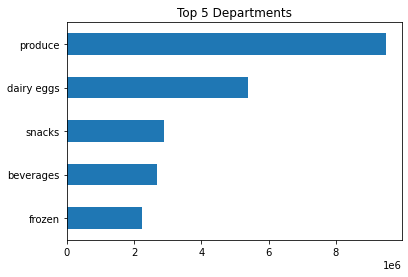

In [19]:
# department
bar_best_department = new_data['department_id'].value_counts().head(5).sort_values().plot.barh(title = 'Top 5 Departments').set_yticklabels(['frozen','beverages','snacks','dairy eggs','produce'])

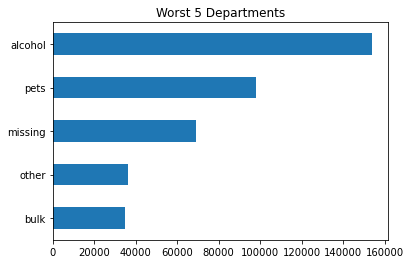

In [20]:
bar_worst_department = new_data['department_id'].value_counts().tail(5).sort_values().plot.barh(title = 'Worst 5 Departments').set_yticklabels(['bulk','other','missing','pets','alcohol'])

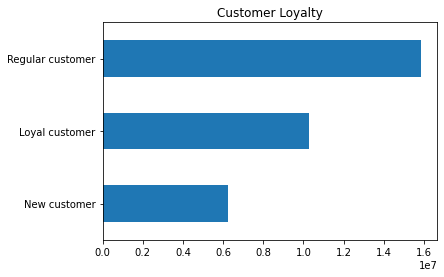

In [21]:
# customer loyalty 
bar_loyalty = new_data['loyalty_flag'].value_counts().sort_values().plot.barh(title = 'Customer Loyalty')

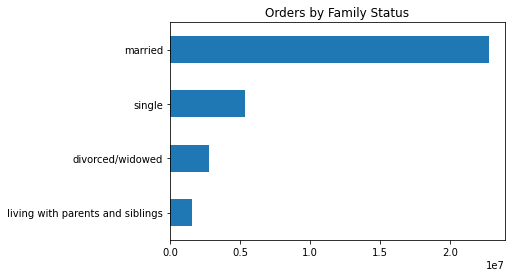

In [22]:
# family
bar_fam_status = new_data['fam_status'].value_counts().sort_values().plot.barh(title = 'Orders by Family Status')

### Histograms

In [ ]:
hist_income = new_data['income'].plot.hist(bins = 25)

### Scatterplots

In [ ]:
scatter = sns.scatterplot(data = new_data, x = 'prices', y = 'income')

### Data Sampling

In [ ]:
np.random.seed(1)
dev = np.random.rand(len(new_data)) <= 0.7

big = new_data(dev)
small = new_data(~dev)

### Line Charts

In [ ]:
sample = small[['income','prices']]

In [ ]:
line = sns.lineplot(data = sample, x = 'income', y= 'prices')

### Export

In [ ]:
bar_income.figure.savefig(os.path.join(path, '2. Data', 'Modified', 'bar_income.png'))